# Exploratory Data Analysis of Historical Disney Data


<p style="text-align:center">
    <img src="https://logos-world.net/wp-content/uploads/2020/05/Walt-Disney-Pictures-Emblem.jpg" width="500" alt="Disney" align="left">
    </a>
</p>

# Introduction

## Questions of interest
In this analysis, I will be evaluating questions related to the Disney dataset. I would like to investigate to determine: 

> **1**: Which genre of movie has generated Disney the most income, and \
> **2**: Whether disney has the most productions in their highest-grossing genre

Adventure movies are popular as they often provide a family-friendly viewing experience, with immersive storylines and captivating scenes and soundtracks. Due to its popularity and accesssabililty to all audiences, I would like to see whether adventure is the top-grossing Disney genre. I expect that this will be the case. 

I expect that the films with the highest gross will also have the highest number of productions (and vice versa). Disney would prefer to produce films which gross the highest, so executives often make business decisions based on past performance, and would therefore produce more films in the genre that generates the most income. 

## Dataset description 

The following description is an exerpt from the [website](https://data.world/kgarrett/disney-character-success-00-16) where the dataset was found:

"This dataset explores the box office data of Walt Disney Studios from 2000 to 2016. It includes information on the movie title, release date, main character, villain, and songs associated with each film. This dataset provides insights into how different elements contribute to a movie's success or failure

When exploring this dataset, there are a few things to keep in mind. Firstly, the data is divided into four different files: `disney-characters.csv`, `disney_movies_total_gross.csv`, `disney-voice-actors.csv`, and `disney_revenue_1991-2016.csv`. Each of these files contains information on different aspects of Disney's box office data.

To make things easier, we've created a quick guide that outlines what you can find in each file:"

* **disney-characters.csv**
    * This file contains information on the movie title, release date, main character, villain, and songs associated with each film
* **disney_movies_total_gross.csv** 
    * This file includes data on the total gross of Walt Disney Studios movies from 2000 to 2016
* **disney-voice-actors.csv** 
    * This file contains information on the voice actors for Disney characters
* **disney_revenue_1991-2016.csv** 
    * This file contains data on the revenue of the Walt Disney Company from 1991 to 2016

# Methods and Results

First, I will import the csv files and visualize the data. 
I will only be importing the **disney_movies_total_gross** file as I am only interested in the `genre` and `inflation_adjusted_gross` variables. I want to create a data frame containing the columns *genre*, *inflation_adjusted_gross*, and a new column *productions* containing the number of movies made in each genre. 

In [1]:
# import required libraries
import altair as alt
import pandas as pd
import numpy as np

# Enable PNG rendering
alt.renderers.enable('png')

# import Disney data
data = pd.read_csv("data/disney_movies_total_gross.csv")

Now, I will use the `head()` method to view the first 5 rows of the data frame

In [2]:
# get first 5 rows of data
data.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


**Table 1: First 5 rows of data frame data**

Using the `info()` method, I can view more information about the data, such as the length, column names and data types.

In [3]:
# get data frame shape and column dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


**Table 2: Data frame shape, columns, dtypes, and memory information**

The data frame has $579$ rows and $6$ columns. For every movie_title, there is a release_date, MPAA_rating, total_gross, and inflation_adjusted_gross.

### Calculating Total Gross and Number of Productions by Genre

By applying the `loc()` method to the **data** data frame, I create a new dataframe containing only the columns **movie_title**, **genre**, and **inflation_adjusted_gross** 

In [4]:
# create data frame with select columns
movies = data.loc[:,['movie_title', 'genre', 'inflation_adjusted_gross']]

Next, I import a script called **func_script** which contains a function `char_del()` that accepts a dataframe, columns, and a list of character strings, then returns the dataframe with strings removed from the designated columns. This script also contains a function `col_div()` that accepts a dataframe, a column, and an integer, then returns the dataframe with the specified column as type int64 and divided by the integer. I use the `char_del()` custom function to format the *inflation_adjusted_gross* column by removing the currency symbol and commas. Then, I use the `col_div()` custom function to change the type of *inflation_adjusted_gross* column to int64 to avoid an OverflowError and divide by 1,000,000 and for readability. 

In [5]:
# import custom modules
import func_script as fs

# remove '$' and ',' from inflation_adjusted_gross
fs.char_del(movies, ['inflation_adjusted_gross'], ['$',','])

# change type to int64 and divide by 1,000,000
fs.col_div(movies, 'inflation_adjusted_gross', 1000000)    

# group by genre, sum inflation_adjusted_gross, and count movie_title
movies_grouped = movies.groupby(by='genre', as_index = False).agg({'inflation_adjusted_gross':'sum','movie_title':'count'})

# rename columns to reflect values
movies_grouped = movies_grouped.reset_index(drop = True).rename({'inflation_adjusted_gross': 'total_gross_M', 'movie_title': 'movie_count'}, axis='columns')
movies_grouped

,genre,total_gross_M,movie_count
0,Action,5498.936786,40
1,Adventure,24561.266158,129
2,Black Comedy,156.730475,3
3,Comedy,15409.526913,182
4,Concert/Performance,114.821678,2
5,Documentary,203.488418,16
6,Drama,8195.804484,114
7,Horror,140.483092,6
8,Musical,9657.565776,16
9,Romantic Comedy,1788.872933,23


**Table 3: Cleaned and grouped data frame. Contains total gross in \$M USD, and count of movies by genre.**

### Visualizing Total Gross and Number of Productions by Genre

I will plot the total gross in millions by genre, which will give a numerical representation of viewers' preference of genre. The public is likely to re-watch and recommend movies they like to others, and as such, this will be reflected in the gross of movies (and thereby genres). 

I will also visualize the number of movies produced by Disney for every genre. This will give an idea of Disney's preference of genre, as a higher number of films produced indicates a preference by Disney to produce a given genre. 

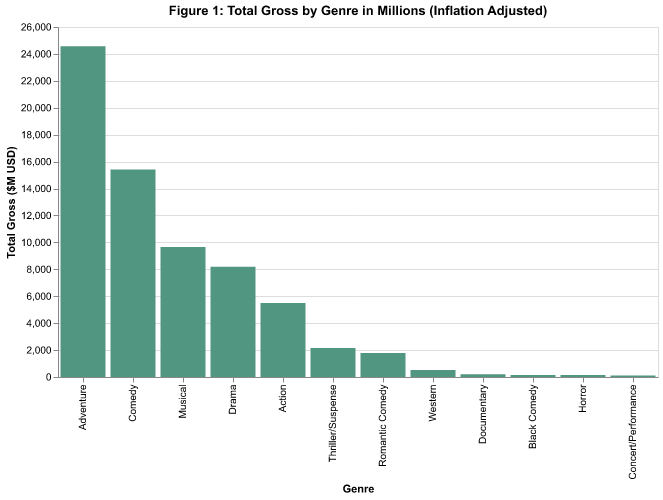

In [6]:
gross_plot = alt.Chart(movies_grouped).mark_bar(color = '#519681').encode(
    x=alt.X('genre', title='Genre', sort = '-y'),
    y=alt.Y('total_gross_M',title='Total Gross ($M USD)')).properties(
    title='Figure 1: Total Gross by Genre in Millions (Inflation Adjusted)', height = 350,width = 600)
gross_plot

From the chart above (figure 1), we see that the genre with the highest total gross is Adventure *(\$24561.27M)*, followed by Comedy *(\$15409.53M)* and Musical *(\$9657.57M)*. The genre with the least total gross is Concert/Performance, with a value of *(\$114.82M)*. 

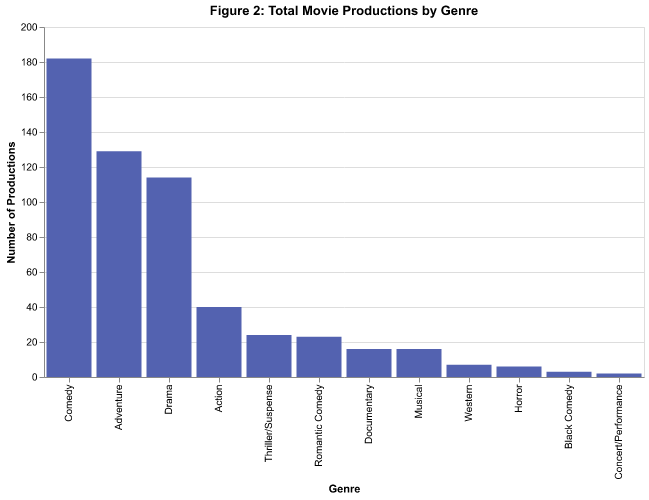

In [7]:
prod_plot = alt.Chart(movies_grouped).mark_bar(color = '#5362b0').encode(
    x=alt.X('genre', title='Genre', sort = '-y'),
    y=alt.Y('movie_count',title='Number of Productions')).properties(
    title='Figure 2: Total Movie Productions by Genre', height = 350,width = 600)
prod_plot

As illustrated above (figure 2), the genre with the most productions is Comedy (*182*), followed by Adventure (*129*) and Drama (*114*). The genre with the least productions is Concert/Performance, with a mere *2* titles. 

# Discussion

This project showcases the analysis of the Disney dataset. The objective was to attempt to evaluate which genre of movie generates Disney the most income, and which genre is most produced by Disney. 

The genre with the highest total gross is Adventure (figure 1), which I had expected. However, I did not expect the result that was obtained for the genre with most productions. 

The genre in which Disney produces the most films is Comedy (figure 2), which was an unexpected result. Despite having a lesser total gross than adventure, comedy films are produced in considerably higher numbers. It may be that Disney produces the most comedy movies because they cost the least time and money to produce, and so they are made in large numbers to compensate for their lower average gross. If these productions cost less, Disney may be inclined to prioritize quantity over quality, and this may contribute to the lower gross per production for comedy films. 

It would be interesting to look at the average cost of production for each genre, as it would provide a better insight into why Disney may opt to produce more or less films in a given genre. As stated above, I would expect that Disney produces the most films in the genre with the lowest average production cost. 

## Resources used
* [Data Source](https://data.world/kgarrett/disney-character-success-00-16)
    * The dataset used in this project was compiled by Kelly Garrett.
* [Plot Styling](https://altair-viz.github.io/user_guide/customization.html#)
    * Documentation for Altair plot styling
* [Plot Configuration](https://altair-viz.github.io/altair-tutorial/notebooks/08-Configuration.html)
    * Documentation for Altair plot elements configuration